# Diamond Price Predictions

In [108]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Some usefull variables

In [109]:
PATH = '../data/diamonds.csv'

## Getting the data

In [110]:
df = pd.read_csv(PATH)
df.drop(df.columns[0], axis=1, inplace=True)
display(df.head())

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Carat:** Weight of the diamond.

**Cut Quality:** Quality of the cut (Fair, Good, Very Good, Premium, Ideal).

**Color:** Diamond color from J (worst) to D (best).

**Clarity:** Clarity of the diamond from I1 (worst) (SI2, SI1, VS2, VS1, VVS2, VVS1) to IF (best).

**Depth:** In terms of cut quality, depth is described in percentages. It can be calculated by dividing the diamond's physical depth measurement by its diameter. In our case, depth = z / mean(x, y) = 2 * z / (x + y).
<img src="../data/depth.png" alt="Diamond Depth" width="500"/>

**Table:** Calculated by dividing the diamond's physical table measurement by its diameter.

**X:** Length in mm.

**Y:** Width in mm.

**Z:** Physical depth measurement in mm.
<img src="../data/table.png" alt="Diamond Table" width="500"/>

**Price:** Price in US dollars.

## Preprocessing the data

In [111]:
cut_encoder = {'Fair': 0, 'Good': 0.25, 'Very Good': 0.5, 'Premium': 0.75, 'Ideal': 1}
clarity_encoder = {'I1': 0, 'SI2': 0.143, 'SI1': 0.286, 'VS2': 0.429, 'VS1': 0.571, 'VVS2': 0.714, 'VVS1': 0.857, 'IF': 1}
color_encoder = {'J': 0, 'I': 0.167, 'H': 0.333, 'G': 0.5, 'F': 0.667, 'E': 0.833, 'D': 1}
df['cut_encoded'] = df.cut.apply(lambda cut: cut_encoder[cut])
df['clarity_encoded'] = df.clarity.apply(lambda clarity: clarity_encoder[clarity])
df['color_encoded'] = df.color.apply(lambda color: color_encoder[color])

## Analyzing the data

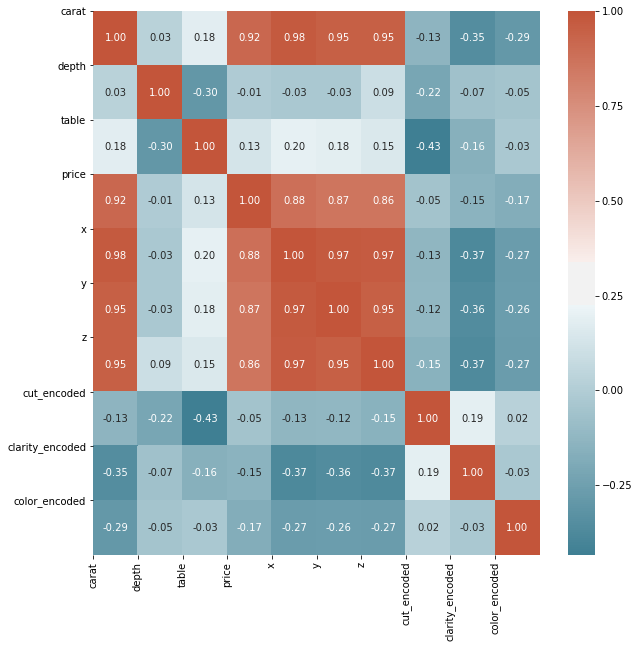

In [118]:
def heatMap(df):
    corr = df.corr()
    plt.subplots(figsize=(10, 10))
    colormap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()
heatMap(df)

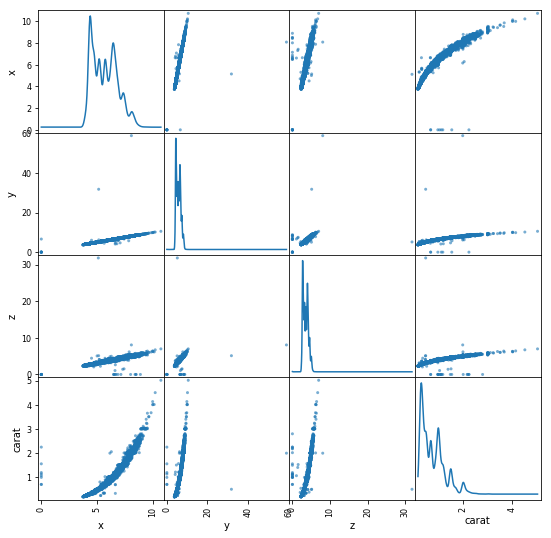

In [119]:
scatter_matrix(df[['x', 'y', 'z', 'carat']], alpha=0.6, diagonal= 'kde', figsize=(9, 9))
plt.show()

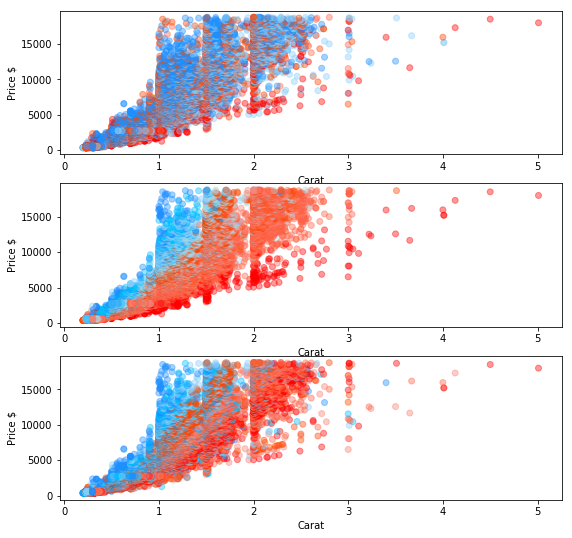

In [129]:
plt.figure(figsize=(9, 9))
colors_map = ['red', 'tomato', 'salmon', 'orangered', 'lightblue', 'lightskyblue', 'deepskyblue', 'dodgerblue', 'blue']
cut_labels = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
clarity_labels = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
color_labels = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
color_names = ['cut', 'clarity', 'color']
labels = [cut_labels, clarity_labels, color_labels]
for i in range(3):
    plt.subplot(3, 1, i + 1)
    colors = df[color_names[i]].apply(lambda x: colors_map[int(labels[i].index(x) / len(labels[i]) * len(colors_map))])
    plt.scatter(df.carat, df.price, alpha=0.4, c=colors)
    plt.xlabel("Carat")
    plt.ylabel("Price $")
plt.show()